# Layer.ai Air Quality Prediction Challenge

Can you use Sentinel 5P data to predict air quality in Kampala for AirQo?

In [1]:
pip install -U layer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 190 kB 5.2 MB/s 
     |████████████████████████████████| 237 kB 66.7 MB/s 
     |████████████████████████████████| 1.3 MB 49.9 MB/s 
     |████████████████████████████████| 343 kB 56.0 MB/s 
     |████████████████████████████████| 132 kB 68.5 MB/s 
     |████████████████████████████████| 35.3 MB 170 kB/s 
     |████████████████████████████████| 4.0 MB 41.7 MB/s 
     |████████████████████████████████| 106 kB 24.1 MB/s 
     |████████████████████████████████| 3.6 MB 56.0 MB/s 
     |████████████████████████████████| 2.4 MB 39.2 MB/s 
     |████████████████████████████████| 9.2 MB 39.3 MB/s 
     |████████████████████████████████| 79 kB 7.6 MB/s 
     |████████████████████████████████| 140 kB 61.8 MB/s 
     |████████████████████████████████| 4.7 MB 48.1 MB/s 
     |████████████████████████████████| 2.4 MB 47.0 MB/s 
     |████████████████████████████

In [2]:
# Libraries
import layer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Get the data

sample_submission = layer.get_dataset("zindi/air-quality/datasets/sample_submission:1.1").to_pandas()

test_df = layer.get_dataset("zindi/air-quality/datasets/test:1.1").to_pandas()

train_df = layer.get_dataset("zindi/air-quality/datasets/train:1.1").to_pandas()


Successfully logged into https://app.layer.ai as guest


Output()

Output()

Output()

In [4]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9923 entries, 0 to 9922
Data columns (total 71 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID                                                        9923 non-null   object 
 1   date                                                      9923 non-null   object 
 2   device                                                    9923 non-null   object 
 3   site_latitude                                             9923 non-null   float64
 4   site_longitude                                            9923 non-null   float64
 5   humidity                                                  9923 non-null   float64
 6   temp_mean                                                 9903 non-null   float64
 7   SulphurDioxide_SO2_column_number_density                  4291 non-null   float64
 8   SulphurDioxide_SO2

,ID,date,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
0,ID_JBYXJEUZ8X,2020-03-18,ANQ16PZJ,0.353465,32.560322,0.846844,22.038542,-0.000138,1.042629,-0.000143,...,4181.792969,69589.453125,3181.793457,7.799846,0.278111,76.618553,9.970293,-93.110069,19.214193,63.853333
1,ID_PEJJNLBUPR,2019-10-13,AB6051M4,0.390741,32.582257,0.874493,21.545833,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.507083
2,ID_21L8UZQO1T,2019-12-21,A0WN66FH,0.285751,32.578325,0.729340,23.568655,NaN,NaN,NaN,...,4440.391113,67341.109375,3440.390869,62.496590,0.416631,-97.300758,63.690605,-127.856804,40.857922,80.290833
3,ID_GNW2G8J4T8,2020-02-20,aq_41,-1.244985,29.989236,0.919271,16.338542,-0.000111,0.750228,-0.000083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.601687
4,ID_4XOX2V6SK0,2019-04-17,aq_41,-1.244985,29.989236,0.858365,16.602083,-0.000127,0.792634,-0.000101,...,4842.057488,64347.788635,3842.057585,4.971117,0.277157,74.786025,32.583070,-57.273638,21.864529,89.642229


In [5]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9923 entries, 0 to 9922
Data columns (total 71 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   ID                                                        9923 non-null   object        
 1   date                                                      9923 non-null   datetime64[ns]
 2   device                                                    9923 non-null   object        
 3   site_latitude                                             9923 non-null   float64       
 4   site_longitude                                            9923 non-null   float64       
 5   humidity                                                  9923 non-null   float64       
 6   temp_mean                                                 9903 non-null   float64       
 7   SulphurDioxide_SO2_column_number_density  

In [6]:
train_df.shape

(9923, 71)

In [7]:
train_df.isnull().sum()/len(train_df)

ID                            0.000000
date                          0.000000
device                        0.000000
site_latitude                 0.000000
site_longitude                0.000000
                                ...   
Cloud_sensor_azimuth_angle    0.152071
Cloud_sensor_zenith_angle     0.152071
Cloud_solar_azimuth_angle     0.152071
Cloud_solar_zenith_angle      0.152071
pm2_5                         0.000000
Length: 71, dtype: float64

In [8]:
sample_submission.head()

,ID,pm2_5
0,ID_UOH62J0XHX,0
1,ID_4OPWSB0UHJ,0
2,ID_3SLMNNG1Z3,0
3,ID_MFUHTXYPM4,0
4,ID_TY1DAND8ZP,0


In [9]:
train_df.select_dtypes('object').nunique()

ID        9923
device      34
dtype: int64

In [10]:
import layer
import pandas as pd


#my_model = layer.get_model("zindi/sample-air-quality/models/air_model").get_train()
#from sklearn.preprocessing import LabelEncoder
#test = layer.get_dataset("zindi/sample-air-quality/datasets/test").to_pandas()
#X = test.drop(["ID","date"], axis=1)
#labelencoder = LabelEncoder()
#X = X.assign(device = labelencoder.fit_transform(X["device"]))
#submission = pd.DataFrame(data=test["ID"], columns = ["ID"])
#submission["pm2_5"] = predictions
#submission.to_csv("submission.csv",index=False)

In [11]:
test_df.head()

,ID,date,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_UOH62J0XHX,2020-10-02,aq_43,0.289040,32.589580,0.756840,23.849653,0.000124,0.839054,0.000104,...,36716.141728,8325.718024,41969.524699,7325.718482,2.632129,0.210430,74.431975,35.449770,-101.546713,21.006060
1,ID_4OPWSB0UHJ,2020-12-07,aq_54,0.356400,32.573000,0.810854,22.075347,NaN,NaN,NaN,...,63086.023438,4060.879639,70871.984375,3060.879639,2.773685,0.344436,-97.300392,63.489811,-125.937134,41.709042
2,ID_3SLMNNG1Z3,2020-11-16,aq_59,0.381576,32.647109,0.883253,20.050694,NaN,NaN,NaN,...,46783.820820,6456.160528,53084.224103,5456.160528,3.862119,0.326882,-97.699519,58.824120,-120.683819,40.183680
3,ID_MFUHTXYPM4,2020-09-05,AW66FF7V,0.379562,32.553714,0.782583,22.248958,0.000176,0.730853,0.000129,...,45528.261719,6682.570801,51503.203125,5682.570801,1.937542,0.212181,75.361595,24.835907,-72.224319,20.675266
4,ID_TY1DAND8ZP,2020-12-15,aq_45,0.344000,32.553000,0.770116,22.565217,NaN,NaN,NaN,...,65512.797785,3757.637022,73461.827324,2757.637022,3.733908,0.262021,76.537080,11.026513,-139.072620,32.046360


In [12]:
train_df['device'].nunique()

34

In [13]:
train_df = train_df.sort_values(by = 'date', ignore_index = True)
#train_df['day'] = pd.to_datetime(train_df['date']).dt.dayofweek
#train_df['month'] = pd.to_datetime(train_df['date']).dt.month


train_df.head()
#train_df.columns

,ID,date,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
0,ID_CE4DAC712J,2019-03-14,aq_30,0.059604,32.46032,0.846583,22.641667,-0.000251,0.527936,-0.000133,...,9897.856413,30049.924328,8889.992462,5.467293,0.206835,-98.336071,52.513670,-95.490160,28.237128,31.415000
1,ID_HIQKM4CT8J,2019-03-15,aq_30,0.059604,32.46032,0.783833,24.325000,-0.000132,0.562716,-0.000074,...,1156.244263,88145.250000,1156.244263,5.077599,0.241493,-100.671776,26.637129,-95.566147,23.584166,28.940000
2,ID_RBKKDULJSK,2019-03-16,aq_30,0.059604,32.46032,0.741972,25.725000,-0.000169,0.550671,-0.000093,...,1156.241545,88152.936593,1156.241545,5.075785,0.221404,76.479022,11.730469,-95.646289,18.962576,34.349272
3,ID_AAI6SF03WX,2019-03-17,aq_30,0.059604,32.46032,0.748049,24.607986,-0.000286,0.669683,-0.000192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.131879
4,ID_TBMFQGXQ5D,2019-03-18,aq_30,0.059604,32.46032,0.735576,24.857639,-0.000120,0.656247,-0.000079,...,1157.109051,88179.422887,1157.109051,4.536230,0.154478,71.651095,62.237459,-96.222612,9.773934,30.584458


In [14]:

#X_train = train_df.drop(columns = ['ID', 'date', 'pm2_5'])
train_df['pm2_5'].head()

0    31.415000
1    28.940000
2    34.349272
3    43.131879
4    30.584458
Name: pm2_5, dtype: float64

In [15]:
train_df.isnull().sum()/ len(train_df)

ID                            0.000000
date                          0.000000
device                        0.000000
site_latitude                 0.000000
site_longitude                0.000000
                                ...   
Cloud_sensor_azimuth_angle    0.152071
Cloud_sensor_zenith_angle     0.152071
Cloud_solar_azimuth_angle     0.152071
Cloud_solar_zenith_angle      0.152071
pm2_5                         0.000000
Length: 71, dtype: float64

In [16]:
# Exploratory Data analysis
import seaborn as sns

train_df.corr()



,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
site_latitude,1.000000,0.983852,-0.060079,0.211806,0.011416,-0.129535,0.008990,0.004280,-0.010412,-0.009114,...,0.034204,-0.023002,0.033442,-0.007353,-0.038008,-0.004680,0.002208,-0.058302,-0.014329,0.010511
site_longitude,0.983852,1.000000,-0.042254,0.248958,0.007557,-0.151891,0.007132,-0.030976,-0.015215,-0.005970,...,0.057173,-0.045111,0.056409,-0.010619,-0.085025,-0.005918,0.004580,-0.060210,-0.016836,-0.037887
humidity,-0.060079,-0.042254,1.000000,0.640713,-0.045796,0.173585,-0.042739,0.124361,-0.016309,-0.011345,...,0.119489,-0.126408,0.123208,0.167880,0.162863,0.005105,0.017593,-0.145806,-0.062597,-0.274381
temp_mean,0.211806,0.248958,0.640713,1.000000,0.015747,-0.131923,0.015909,-0.022228,0.023187,0.014965,...,0.065123,-0.059333,0.067595,-0.023537,-0.046161,0.004700,0.002056,-0.198523,-0.129440,-0.176744
SulphurDioxide_SO2_column_number_density,0.011416,0.007557,-0.045796,0.015747,1.000000,-0.102081,0.957376,-0.019838,-0.007512,0.140617,...,0.004150,-0.019115,0.004179,-0.035097,0.005632,0.005085,0.158392,-0.022535,0.016940,0.034735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cloud_sensor_azimuth_angle,-0.004680,-0.005918,0.005105,0.004700,0.005085,0.005381,0.015053,-0.062497,1.000000,0.049157,...,0.104994,-0.119315,0.095105,0.027559,-0.174404,1.000000,0.118031,0.019960,-0.696626,0.009408
Cloud_sensor_zenith_angle,0.002208,0.004580,0.017593,0.002056,0.158392,-0.037214,0.144243,0.148292,0.049120,0.999994,...,0.092253,-0.093702,0.094639,0.223346,0.265677,0.118031,1.000000,-0.011953,0.013828,-0.004071
Cloud_solar_azimuth_angle,-0.058302,-0.060210,-0.145806,-0.198523,-0.022535,0.222085,-0.007472,0.002382,0.040713,0.010026,...,-0.109844,0.121430,-0.110367,-0.067229,-0.086278,0.019960,-0.011953,1.000000,0.024118,-0.046128
Cloud_solar_zenith_angle,-0.014329,-0.016836,-0.062597,-0.129440,0.016940,0.065930,0.004026,0.030313,-0.675013,0.083336,...,-0.116395,0.127884,-0.108789,-0.018443,0.285432,-0.696626,0.013828,0.024118,1.000000,0.046903


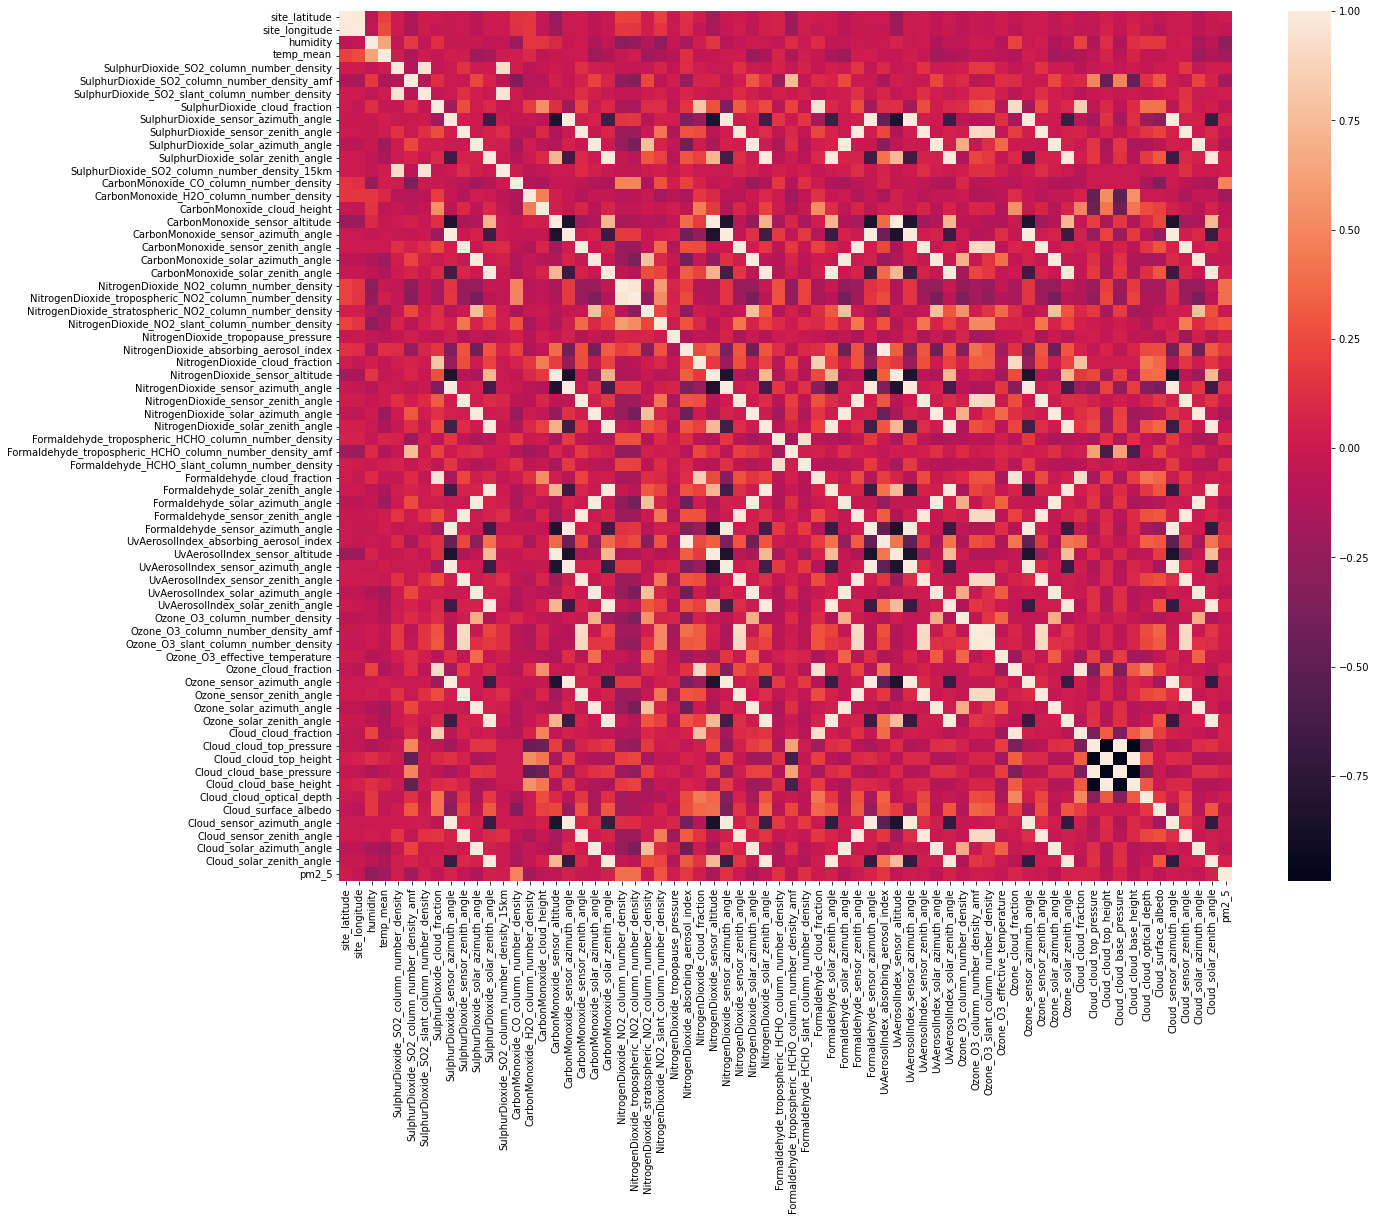

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,16))
sns.heatmap(train_df.corr(), ax = ax);

In [18]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.3 MB/s 


In [19]:
# Train a simple Linear and Ridge Models

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

from category_encoders import OneHotEncoder



In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
# Time Series Split
from sklearn.model_selection import TimeSeriesSplit
#test_siz = int(0.05*(len(train_df)))

tscv = TimeSeriesSplit(n_splits=3, test_size= 2)


X = train_df.drop(columns = ['date', 'ID', 'pm2_5'], axis=1)
y = train_df['pm2_5']

for train_index, test_index in tscv.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [   0    1    2 ... 9914 9915 9916] TEST: [9917 9918]
TRAIN: [   0    1    2 ... 9916 9917 9918] TEST: [9919 9920]
TRAIN: [   0    1    2 ... 9918 9919 9920] TEST: [9921 9922]


In [22]:
# Baseline model

y_mean = y_train.mean()
y_pred_baseline = [y_mean]* len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print(f'The mean for PM2.5 is {y_mean}')
print(f'The MAE for the baseline model is {mae_baseline}')

The mean for PM2.5 is 57.10751113660515
The MAE for the baseline model is 21.09157087346278


In [23]:
# Linear Model

linear_model = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(),
    LinearRegression()
)

linear_model.fit(X_train, y_train)

y_pred_lin_tr = linear_model.predict(X_train)
y_pred_lin = linear_model.predict(X_test)

mae_lin_tr = mean_absolute_error(y_train, y_pred_lin_tr)
mae_lin = mean_absolute_error(y_test, y_pred_lin)

print(f'The MAE for the Linear model in the train set is {mae_lin_tr}')
print(f'The MAE for the Linear model in the test set is {mae_lin}')


The MAE for the Linear model in the train set is 14.849782148398937
The MAE for the Linear model in the test set is 17.83530716281467


In [24]:
# Ridge Model

ridge_model = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(),
    Ridge()
)

ridge_model.fit(X_train, y_train)

y_pred_ridge_tr = ridge_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_test)

mae_ridge_tr = mean_absolute_error(y_train, y_pred_ridge_tr)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f'The MAE for the Ridge model in the train set is {mae_ridge_tr}')
print(f'The MAE for the Ridge model in the test set is {mae_ridge}')


The MAE for the Ridge model in the train set is 15.766894881057429
The MAE for the Ridge model in the test set is 10.978015144580521


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import lightgbm as lgb
#import xgboost
from xgboost import XGBRegressor

pipelines = {
    'lin' : make_pipeline(OneHotEncoder(use_cat_names = True), StandardScaler(with_mean=False), SimpleImputer(), LinearRegression()),
    'ridge' : make_pipeline(OneHotEncoder(use_cat_names = True), StandardScaler(with_mean=False), SimpleImputer(), Ridge()),
    'las' : make_pipeline(OneHotEncoder(use_cat_names = True), StandardScaler(with_mean=False), SimpleImputer(), Lasso()),
    'svr' : make_pipeline(OneHotEncoder(use_cat_names = True), StandardScaler(with_mean=False), SimpleImputer(), SVR()),
    'rf' : make_pipeline(OneHotEncoder(use_cat_names = True), StandardScaler(with_mean=False), SimpleImputer(), RandomForestRegressor(n_jobs=-1)),
    'gbr' : make_pipeline(OneHotEncoder(use_cat_names = True), StandardScaler(with_mean=False), SimpleImputer(), GradientBoostingRegressor()),
    'xgb' : make_pipeline(OneHotEncoder(use_cat_names = True), StandardScaler(with_mean=False), SimpleImputer(), XGBRegressor()),
    'lgb' : make_pipeline(OneHotEncoder(use_cat_names = True), StandardScaler(with_mean=False), SimpleImputer(), lgb.LGBMRegressor(num_leaves = 27))
}

for name, estimator in pipelines.items():
  estimator.fit(X_train, y_train)
  y_pred_tr = estimator.predict(X_train)
  y_pred_test = estimator.predict(X_test)
  mae_tr = mean_absolute_error(y_train, y_pred_tr)
  mae_test = mean_absolute_error(y_test, y_pred_test)
  print(f'The MAE for the {name} model in the train set is {round(mae_tr, 2)}')
  print(f'The MAE for the {name} model in the test set is {round(mae_test, 2)}')



The MAE for the lin model in the train set is 14.85
The MAE for the lin model in the test set is 17.81
The MAE for the ridge model in the train set is 14.85
The MAE for the ridge model in the test set is 17.84
The MAE for the las model in the train set is 16.18
The MAE for the las model in the test set is 9.15
The MAE for the svr model in the train set is 20.72
The MAE for the svr model in the test set is 4.16
The MAE for the rf model in the train set is 3.81
The MAE for the rf model in the test set is 14.22
The MAE for the gbr model in the train set is 12.42
The MAE for the gbr model in the test set is 11.19
[06:55:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The MAE for the xgb model in the train set is 12.48
The MAE for the xgb model in the test set is 11.44
The MAE for the lgb model in the train set is 8.35
The MAE for the lgb model in the test set is 7.1


In [26]:
train_df_ = train_df
train_df_['day'] = pd.to_datetime(train_df['date']).dt.dayofweek
train_df_['month'] = pd.to_datetime(train_df['date']).dt.month


X_ = train_df_.drop(columns = ['date', 'ID', 'pm2_5'], axis=1)
y_ = train_df_['pm2_5']

for train_index_, test_index_ in tscv.split(X_):
  print("TRAIN:", train_index_, "TEST:", test_index_)
  X_train_, X_test_ = X_.iloc[train_index_], X_.iloc[test_index_]
  y_train_, y_test_ = y_.iloc[train_index_], y.iloc[test_index_]

pipelines = {
    'lin' : make_pipeline(OneHotEncoder(use_cat_names = True), StandardScaler(with_mean=False), SimpleImputer(), LinearRegression()),
    'ridge' : make_pipeline(OneHotEncoder(use_cat_names = True), StandardScaler(with_mean=False), SimpleImputer(), Ridge()),
    'las' : make_pipeline(OneHotEncoder(use_cat_names = True), StandardScaler(with_mean=False), SimpleImputer(), Lasso()),
    'svr' : make_pipeline(OneHotEncoder(use_cat_names = True), StandardScaler(with_mean=False), SimpleImputer(), SVR()),
    'rf' : make_pipeline(OneHotEncoder(use_cat_names = True), StandardScaler(with_mean=False), SimpleImputer(), RandomForestRegressor(n_jobs=-1)),
    'gbr' : make_pipeline(OneHotEncoder(use_cat_names = True), StandardScaler(with_mean=False), SimpleImputer(), GradientBoostingRegressor()),
    'xgb' : make_pipeline(OneHotEncoder(use_cat_names = True), StandardScaler(with_mean=False), SimpleImputer(), XGBRegressor()),
    'lgb' : make_pipeline(OneHotEncoder(use_cat_names = True), StandardScaler(with_mean=False), SimpleImputer(), lgb.LGBMRegressor(num_leaves = 27))
}

for name, estimator in pipelines.items():
  estimator.fit(X_train_, y_train_)
  y_pred_tr = estimator.predict(X_train_)
  y_pred_test = estimator.predict(X_test_)
  mae_tr = mean_absolute_error(y_train, y_pred_tr)
  mae_test = mean_absolute_error(y_test, y_pred_test)
  print(f'The MAE for the {name} model in the train set is {round(mae_tr, 2)}')
  print(f'The MAE for the {name} model in the test set is {round(mae_test, 2)}')


TRAIN: [   0    1    2 ... 9914 9915 9916] TEST: [9917 9918]
TRAIN: [   0    1    2 ... 9916 9917 9918] TEST: [9919 9920]
TRAIN: [   0    1    2 ... 9918 9919 9920] TEST: [9921 9922]
The MAE for the lin model in the train set is 14.81
The MAE for the lin model in the test set is 17.2
The MAE for the ridge model in the train set is 14.81
The MAE for the ridge model in the test set is 17.22
The MAE for the las model in the train set is 16.18
The MAE for the las model in the test set is 9.15
The MAE for the svr model in the train set is 20.72
The MAE for the svr model in the test set is 4.16
The MAE for the rf model in the train set is 3.33
The MAE for the rf model in the test set is 16.91
The MAE for the gbr model in the train set is 11.43
The MAE for the gbr model in the test set is 16.1
[06:56:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The MAE for the xgb model in the train set is 11.63
The MAE for the xgb mod

In [27]:
# SVR  Model


svr_model = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    StandardScaler(with_mean=False),
    SimpleImputer(),
    SVR()
    #Lasso(normalize=True, tol=1e-2)
)

svr_model.fit(X_train, y_train)

y_pred_svr_tr = svr_model.predict(X_train)
y_pred_svr = svr_model.predict(X_test)

mae_svr_tr = mean_absolute_error(y_train, y_pred_svr_tr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print(f'The MAE for the svr model in the train set is {mae_svr_tr}')
print(f'The MAE for the SVR model in the test set is {mae_svr}')


The MAE for the svr model in the train set is 20.716119457428444
The MAE for the SVR model in the test set is 4.1617534339033035


In [28]:
# Tuning Light GBM

num_leaves_ = range(2, 50, 5)
n_estimators_ = range(1, 150, 10)

training_mae = []
validation_mae = []


for n in num_leaves_:
  for e in n_estimators_:

    # Pipeline
    light_model = make_pipeline(
      OneHotEncoder(use_cat_names = True),
      SimpleImputer(),
      lgb.LGBMRegressor(num_leaves = n, n_estimators= e)
    )
    
    # Fit model
    light_model.fit(X_train, y_train)

    # Make predictions
    y_pred_light_tr = light_model.predict(X_train)
    y_pred_light = light_model.predict(X_test)

    # Evaluate the metric
    mae_light_tr = mean_absolute_error(y_train, y_pred_light_tr)
    mae_light = mean_absolute_error(y_test, y_pred_light)

    # Append the results
    training_mae.append(mae_light_tr)
    validation_mae.append(mae_light)

#Print mean square errors
print(f'Training MAE are {training_mae}')
print(f'Testing MAE are {validation_mae}')


# Plotting the accuracies
#plt.plot(num_leaves_, training_mae, label = 'Training MAE')
#plt.plot(num_leaves_, validation_mae, label = 'Validation MAE')
#plt.xlabel('Number of leaves')
#plt.ylabel('Mean Absolute Error')
#plt.legend();

Training MAE are [20.894858962620955, 19.54988024563175, 18.789569248303927, 18.274781995762325, 17.8657982208181, 17.54003426180728, 17.2417187381958, 16.990087726139173, 16.763860935948408, 16.55535772383507, 16.364087646647356, 16.18320025215713, 16.023697979094326, 15.880765903632856, 15.753425082630441, 20.596606787692473, 17.424387088270567, 15.800077809588599, 14.761433398620772, 14.123157290232383, 13.605963583019875, 13.25958583765698, 12.933731292990213, 12.652859161879947, 12.422805715621738, 12.204534604955214, 12.001104306879633, 11.829796424748162, 11.662960418443161, 11.505787378963822, 20.44187041001404, 16.666474714291137, 14.747107095446546, 13.607407643026368, 12.84931704442069, 12.32982279668308, 11.880386394203503, 11.49065438379194, 11.15623669636079, 10.869918492778073, 10.636102187467142, 10.417001134916962, 10.192110430842115, 9.975954452949102, 9.803111064913006, 20.374101977027692, 16.066110818929587, 14.027921457223206, 12.833250344824895, 11.987679839043222

In [29]:
light_model

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['device'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('lgbmregressor',
                 LGBMRegressor(n_estimators=141, num_leaves=47))])

In [36]:
# Tuning Light GBM

num_leaves_ = range(2, 50, 5)
n_estimators_ = range(1, 150, 10)

training_mae = []
validation_mae = []


for n in num_leaves_:
  for e in n_estimators_:

    # Pipeline
    light_model = make_pipeline(
      OneHotEncoder(use_cat_names = True),
      SimpleImputer(),
      lgb.LGBMRegressor(num_leaves = n, n_estimators= e)
    )
    
    # Fit model
    light_model.fit(X_train, y_train)

    # Make predictions
    y_pred_light_tr = light_model.predict(X_train)
    y_pred_light = light_model.predict(X_test)

    # Evaluate the metric
    mae_light_tr = mean_absolute_error(y_train, y_pred_light_tr)
    mae_light = mean_absolute_error(y_test, y_pred_light)

    # Append the results
    training_mae.append(mae_light_tr)
    validation_mae.append(mae_light)

#Print mean square errors
print(f'Training MAE are {training_mae}')
print(f'Testing MAE are {validation_mae}')




Training MAE are [20.894858962620955, 19.54988024563175, 18.789569248303927, 18.274781995762325, 17.8657982208181, 17.54003426180728, 17.2417187381958, 16.990087726139173, 16.763860935948408, 16.55535772383507, 16.364087646647356, 16.18320025215713, 16.023697979094326, 15.880765903632856, 15.753425082630441, 20.596606787692473, 17.424387088270567, 15.800077809588599, 14.761433398620772, 14.123157290232383, 13.605963583019875, 13.25958583765698, 12.933731292990213, 12.652859161879947, 12.422805715621738, 12.204534604955214, 12.001104306879633, 11.829796424748162, 11.662960418443161, 11.505787378963822, 20.44187041001404, 16.666474714291137, 14.747107095446546, 13.607407643026368, 12.84931704442069, 12.32982279668308, 11.880386394203503, 11.49065438379194, 11.15623669636079, 10.869918492778073, 10.636102187467142, 10.417001134916962, 10.192110430842115, 9.975954452949102, 9.803111064913006, 20.374101977027692, 16.066110818929587, 14.027921457223206, 12.833250344824895, 11.987679839043222

In [31]:
light_model

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['device'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('lgbmregressor',
                 LGBMRegressor(n_estimators=141, num_leaves=47))])

In [39]:
#my_model = layer.get_model("zindi/sample-air-quality/models/air_model").get_train()

#from sklearn.preprocessing import LabelEncoder
#test = layer.get_dataset("zindi/sample-air-quality/datasets/test").to_pandas()
#X = test.drop(["ID","date"], axis=1)
#labelencoder = LabelEncoder()
#X = X.assign(device = labelencoder.fit_transform(X["device"]))

test = pd.read_csv('/content/drive/MyDrive/Air Quality/airquality_test.csv')
#test['day'] = pd.to_datetime(test['date']).dt.dayofweek
#test['month'] = pd.to_datetime(test['date']).dt.month

#test = test.sort_values(by = 'date')
submission = pd.DataFrame(data=test["ID"], columns = ["ID"])

test = test.drop(columns = ['ID', 'date'], axis = 1)



submission["pm2_5"] = light_model.predict(test)
submission.to_csv("submission.csv",index=False)

In [38]:
test.head()

,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,aq_43,0.289040,32.589580,0.756840,23.849653,0.000124,0.839054,0.000104,0.063487,74.430419,...,36716.141728,8325.718024,41969.524699,7325.718482,2.632129,0.210430,74.431975,35.449770,-101.546713,21.006060
1,aq_54,0.356400,32.573000,0.810854,22.075347,NaN,NaN,NaN,NaN,NaN,...,63086.023438,4060.879639,70871.984375,3060.879639,2.773685,0.344436,-97.300392,63.489811,-125.937134,41.709042
2,aq_59,0.381576,32.647109,0.883253,20.050694,NaN,NaN,NaN,NaN,NaN,...,46783.820820,6456.160528,53084.224103,5456.160528,3.862119,0.326882,-97.699519,58.824120,-120.683819,40.183680
3,AW66FF7V,0.379562,32.553714,0.782583,22.248958,0.000176,0.730853,0.000129,0.085770,75.361610,...,45528.261719,6682.570801,51503.203125,5682.570801,1.937542,0.212181,75.361595,24.835907,-72.224319,20.675266
4,aq_45,0.344000,32.553000,0.770116,22.565217,NaN,NaN,NaN,NaN,NaN,...,65512.797785,3757.637022,73461.827324,2757.637022,3.733908,0.262021,76.537080,11.026513,-139.072620,32.046360


In [40]:
# Sample of the submission file
submission.head(5)

,ID,pm2_5
0,ID_UOH62J0XHX,42.462395
1,ID_4OPWSB0UHJ,121.114492
2,ID_3SLMNNG1Z3,65.573624
3,ID_MFUHTXYPM4,70.301302
4,ID_TY1DAND8ZP,84.103383
